# **Lab 3 - Sistemi Lineari: Metodi Diretti**

Siano dati la matrice $\mathbf{A}\in\mathbb{R}^ {n\times n}$ e i vettori $\mathbf{x}\in\mathbb{R}^{n}$,  $\mathbf{y}\in\mathbb{R}^{n}$  e  $\mathbf{b}\in\mathbb{R}^{n}$,  tali che $\mathbf{x}$  è la soluzione del sistema $\mathbf{Ax} = \mathbf{b}$.

# **Fattorizzazione LU**

L'algoritmo di risoluzione per il sistema lineare tramite la fattorizzazione LU implica i seguenti passi:

1. Fattorizzazione LU della matrice **A** (eventualmente con pivoting) che darà in output due (o tre) matrici di $\mathbb{R}^{n\times n}$:

*   $\mathbf{L}$ triangolare inferiore,
*   $\mathbf{U}$ triangolare superiore,
*   $\mathbf{P}$ matrice di permutazione in caso di pivoting.

2. Risoluzione del sistema lineare $\mathbf{LUx} = \mathbf{b}$ (in assenza di pivoting, ovvero per $\mathbf{P}=\mathbf{I}$):

* Risolvere tramite *forward substitution* il sistema $\mathbf{Ly} = \mathbf{b}$,
* Risolvere tramite *backward substitution* il sistema $\mathbf{Ux} = \mathbf{y}$.

In particolare, gli algoritmi di sostituzione in avanti e indietro sono strutturati nel modo seguente: siano $l_{ij}$ e $u_{ij}$ gli elementi delle matrici $\mathbf{L}$ e $\mathbf{U}$ rispettivamente, entrambi gli algoritmi si sviluppano scorrendo le righe $i$ dei sistemi.

**Forward substitution** per il sistema $\mathbf{Ly} = \mathbf{b}$:

$$\begin{aligned}
y_1 =& \dfrac{b_1}{l_{11}}, \\
y_i =& \dfrac{1}{l_{ii}}\left( b_i-\sum_{j=1}^{i-1} l_{ij} y_j \right), \quad i=2,\dots,n.
\end{aligned}$$

**Backward substitution** per il sistema $\mathbf{Ux} = \mathbf{y}$:

$$\begin{aligned}
x_n =& \dfrac{y_n}{u_{nn}},\\
x_i =& \dfrac{1}{u_{ii}}\left( y_i-\sum_{j=i+1}^{n} u_{ij} x_j \right), \quad i=n-1,\dots,1.
\end{aligned}$$




## **<font color='red'>WARNING!! </font>**

A lezione avete visto che la fattorizzazione con pivoting si scrive $\mathbf{P}\mathbf{A} = \mathbf{L} \mathbf{U}$ e questo implica risolvere il sistema $\mathbf{P}\mathbf{A}x = \mathbf{P} \mathbf{b}$.

In Python la fattorizzazione con pivoting è la seguente: $\mathbf{A} = \mathbf{P}\mathbf{L} \mathbf{U}$ e questo implica risolvere il sistema $\mathbf{P^T}\mathbf{A}x = \mathbf{P^T} \mathbf{b}$, dal momento che $\mathbf{P^T}\mathbf{P}=\mathbf{I}$.

# **Esercizio 3.1**

Una sorgente di fluido refrigerante di portata $q_0$ raffredda $n$ macchine distribuite in parallelo come schematizzato in figura.

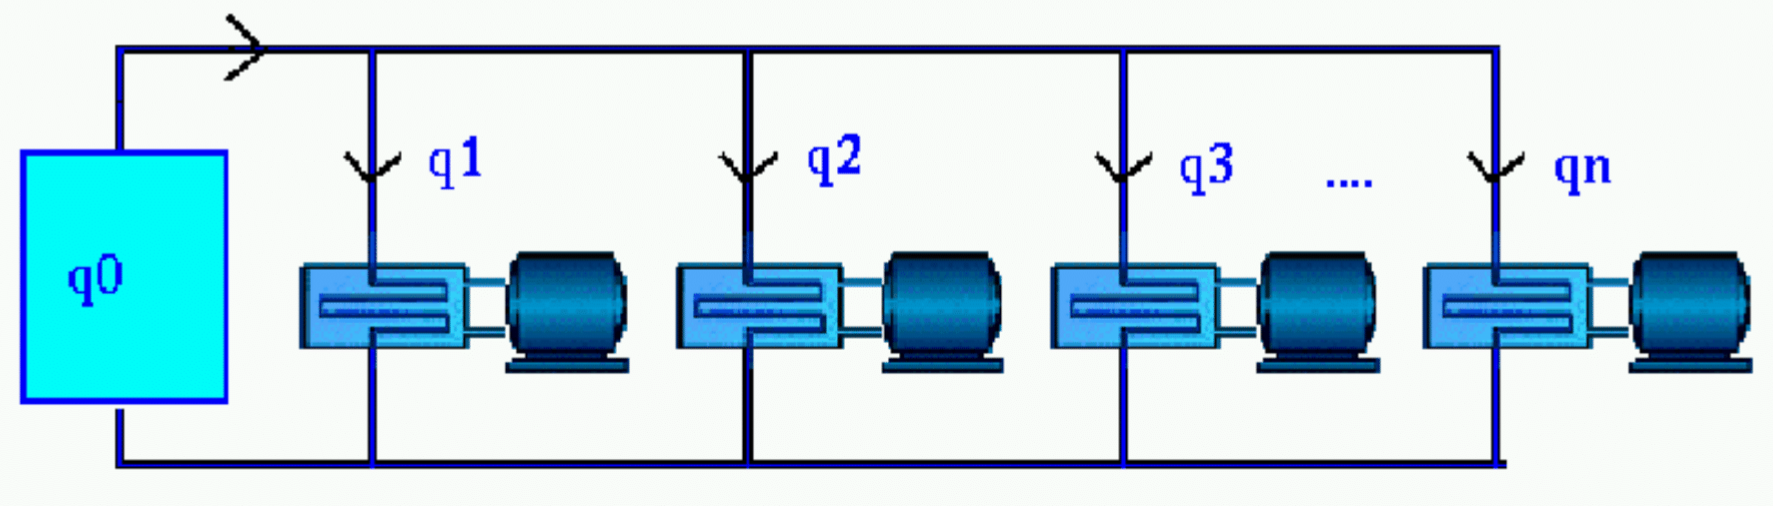

La caduta di pressione $\Delta p_i$ in ogni macchina è legata alla portata di fluido $q_i$ che la attarversa tramite la relazione:

$$\Delta p_i = R_i q_i,$$

dove $R_i$ rappresenta la resistenza e gli attriti nel passaggio del fluido attraverso l'$i$-esima macchina. Si vuole determinare la portata $q_i$ che raggiunge ciascuna macchina. Il calcolo delle portate $q_i$ conduce al seguente sistema lineare $\mathbf{A}\mathbf{q} = \mathbf{b}$:

$$\underbrace{\begin{bmatrix}
1 & 1 & 1 & 1 & \dots & 1 \\
R_1 & -R_2 & 0 & 0 & \dots & 0 \\
0 & R_2 & -R_3 & 0 & \dots & 0 \\
\vdots & 0 & \ddots & \ddots &  & \vdots \\
\vdots & \vdots & & \ddots & \ddots & \vdots \\
0 & 0 & 0 & \dots & R_{n-1} -R_n
\end{bmatrix}}_{\mathbf{A}}
\cdot
\underbrace{
\begin{bmatrix}
q_1 \\ q_2 \\ q_3 \\ \vdots \\ \vdots \\ q_n
\end{bmatrix}}_{\mathbf{q}}
=
\underbrace{
  \begin{bmatrix}
q_0 \\ 0 \\ 0 \\ \vdots \\ \vdots \\ 0
\end{bmatrix}}_{\mathbf{b}}$$

La prima equazione del sistema lineare esprime il fatto che $\sum_{i=1}^nq_i=q_0$, mentre le altre $n-1$ equazioni si ricavano tenendo conto che le cadute di pressione $\Delta p_i$ in ogni macchina sono tutte uguali (essendo le macchine in parallelo), quindi per ogni $i$, con $i=1,\dots,n-1$, possiamo ricavare l'equazione $R_iq_i -R_{i+1}q_{i+1} = 0$.


<mark>**Esercizio 3.1.1**</mark></br>
Si ponga $n=20$, $R_i=1$, con $i=1,\dots,n$ e $q_0=2$. Costruire la matrice $\mathbf{A}$  e il vettore del termini noti $\mathbf{b}$.

In [3]:
# importazione pacchetti
import numpy as np
# dimensione matrice
n = 20
# termine noto
q0 = 2
# vettore di tutti 1 di dimensione n
R = np.ones(n)

# costruzione matrice A
A = -np.diag(R) + np.diag(R[0:n-1],-1)
A[0,:] = 1
# costruzione termine noto b
b = np.zeros(n)
b[0] = q0

<mark>**Esercizio 3.1.2**</mark></br>  Si calcoli la fattorizzazione LU con pivoting della matrice $\mathbf{A}$, mediante la funzione $\verb|lu|$ della libreria $\verb|scipy.linalg|$ di Python. Verificare che la tecnica del pivoting non è stata usata in questo caso.

In [4]:
# imporazione libreria scipy.linalg
import scipy.linalg

# chimata fattorizzazione LU
P, L, U = scipy.linalg.lu(A)

# verifica che la matrice è la matrice identità
if (P == np.eye(n)).all():
  print("P=I, no pivoting")

P=I, no pivoting


<mark>**Esercizio 3.1.3**</mark></br>
Scrivere una funzione $\verb|fwsub|$ che, dati in ingresso una matrice triangolare inferiore $\mathbf{L}\in\mathbb{R}^{n\times n}$ e un vettore $\mathbf{f}\in\mathbb{R}^{n}$, restituisca in uscita il vettore $\mathbf{x}\in\mathbb{R}^{n}$, soluzione del sistema $\mathbf{Lx}=\mathbf{f}$, calcolata mediante l'algoritmo della sostituzione in avanti (*forward substitution*). L'intestazione della funzione sarà ad esempio la seguente:

        def fwsub (A,b):
        #
        return x



In [5]:
def fwsub(A,b):

  # Algoritmo di sostituzione in avanti - forward substitution
  # A: matrice quadrata triangolare inferiore
  # b: termine noto
  # x: soluzione del sistema Ax = b

  # dimesinoe termine noto b
  n = b.shape[0]

  # Verifichiamo che la matrice sia quadrata
  if A.shape[0] != A.shape[1]:
    raise RuntimeError("ERRORE: matrice non quadrata")

  # Verifichiamo che la matrice sia triangolare inferiore
  if (A != scipy.linalg.tril(A)).any():
    raise RuntimeError("ERRORE: matrice non triangolare inferiore")

  # Verifichiamo che la matrice sia invertibile
  # Essendo triangolare, i suoi autovalori si trovano sulla diagonale principale
  if np.prod(np.diag(A)) == 0:
    raise RuntimeError("ERRORE: matrice singolare")

  # inizializzo il vettore
  x = np.zeros(n)
  # costruzione forward substitution
  x[0] = b[0]/A[0,0]

  for i in range(1,n):
    x[i] = (b[i] - A[i,0:i] @ x[0:i]) / A[i,i]

  # Versione alternativa: doppio ciclo for
  #  x = np.zeros(n)
  #  x[0] = b[0] / A[0,0]
  #
  #  for i in range(1,n):
  #    s = 0
  #
  #    for j in range(0,i):
  #      s = s + A[i,j] * x[j]
  #
  #    x[i] = (b[i] - s) / A[i,i]

  return x

<mark>**Esercizio 3.1.4**</mark></br>
In modo analogo, scrivere la funzione $\verb|bksub|$ che implementi l'algoritmo della sostituzione all'indietro (*backward substitution*) per matrici triangolari superiori $\mathbf{U}$.
L'intestazione della funzione sarà ad esempio la seguente:

        def bksub(A,b)
        #
        return x


**Nota:** Volendo è possibile utilizzare i comandi Python $\verb|scipy.linalg.triu|$ e $\verb|scipy.linalg.tril|$ che, data una matrice, estraggono rispettivamente la matrice triangolare superiore ed inferiore.

In [6]:
def bksub(A,b):

  # Algoritmo di sostituzione all'indietro - backward substitution
  # A: matrice quadrata triangolare superiore
  # b: termine noto
  # x: soluzione del sistema Ax = b

  # inizializzo il vettore x
  x = []
  # dimensione vettore b
  n = b.shape[0]

  # Verifichiamo che la matrice sia quadrata
  if A.shape[0] != A.shape[1]:
    raise RuntimeError("ERRORE: matrice non quadrata")

  # Verifichiamo che la matrice sia triangolare inferiore
  if (A != scipy.linalg.triu(A)).any():
    raise RuntimeError("ERRORE: matrice non triangolare superiore")

  # Verifichiamo che la matrice sia invertibile
  # Essendo triangolare, i suoi autovalori si trovano sulla diagonale principale
  if np.prod(np.diag(A)) == 0:
    raise RuntimeError("ERRORE: matrice singolare")

  x = np.zeros(n)
  #x[n-1] = b[n-1]/A[n-1,n-1]
  x[-1] = b[-1]/A[-1,-1]

  for i in range(n-2,-1,-1):
      x[i] = (b[i] - A[i,i+1:n] @ x[i+1:n]) / A[i,i]


    # Versione alternativa: doppio ciclo for
    #  x = np.zeros(n)
    #  x[-1] = b[-1] / A[-1,-1]
    #
    #  for i in range(n-2,-1,-1):
    #    s = 0
    #
    #    for j in range(i,n):
    #      s = s + A[i,j] * x[j]
    #
    #    x[i] = (b[i] - s) / A[i,i]

  return x

<mark>**Esercizio 3.1.5**</mark></br>  
Risolvere numericamente, utilizzando le funzioni $\verb|fwsub|$ e $\verb|bksub|$ implementate nei punti precedenti, i due sistemi triangolari necessari per ottenere la soluzione del sistema di partenza $\mathbf{Aq} = \mathbf{b}$.

In [7]:
y = fwsub(L, P.T@b)
x = bksub(U, y)

# Ly è esattamente uguale a x
print((L@y == b).all())

# Ux non è esattamente uguale a y
print((U@x == y).all())
# Ux è uguale a y a meno di una tolleranza (epsilon macchina)
print(np.allclose(U@x, y))


True
False
True


# **Esercizio 3.2**

Si consideri il sistema lineare $\mathbf{Hx} = \mathbf{b}$ con:

$$\mathbf{H} =
\begin{bmatrix}
1 & \dfrac{1}{2} & \dfrac{1}{3} & \dots & \dfrac{1}{n} \\
\dfrac{1}{2} & \dfrac{1}{3} & \dfrac{1}{4} & \dots & \dfrac{1}{n+1} \\
\dfrac{1}{3} & \dfrac{1}{4} & \dfrac{1}{5} & \dots & \dfrac{1}{n+2} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
\dfrac{1}{n} & \dfrac{1}{n+1} & \dfrac{1}{n+2} & \dots & \dfrac{1}{2n-1}
\end{bmatrix}$$

La matrice $\mathbf{H}$, $h_{ij} = (i+j-1)^{-1}$, con $i,j=1,\dots,n$, è nota come *matrice di Hilbert* e costituisce un classico esempio di matrice mal condizionata. Si prenda termine noto $\mathbf{b}$ in modo da avere come soluzione esatta del sistema il vettore $\mathbf{x}_{\text{ex}} = [1,1,\dots,1]^T$. La funzione $\verb|hilbert|$ di $\verb|scipy.linalg|$ permette di generare la matrice di Hilbert di dimensione $n\times n$.

<mark>**Esercizio 3.2.1**</mark></br> Fissato $n=5$, si determini la fattorizzazione LU della matrice $\mathbf{H}$ tramite la funzione $\verb|lu|$. È stata effettutata qualche permutazione delle righe di $\mathbf{H}$? Se sì, quale?

P != I, pivoting


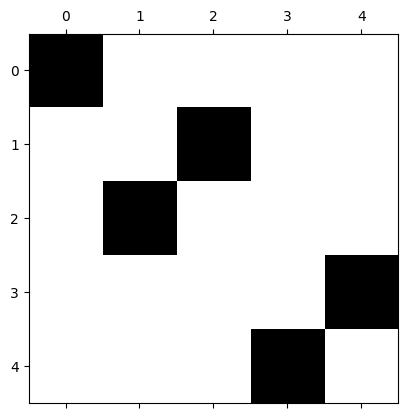

In [8]:
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

n = 5
H = scipy.linalg.hilbert(n)

P, L, U = scipy.linalg.lu(H)

if (P == np.eye(n)).all():
  print("P = I, no pivoting")
else:
  print("P != I, pivoting")

# Visualizziamo gli elementi diversi da zero della matrice P
plt.spy(P)
plt.show()

<mark>**Esercizio 3.2.2**</mark></br>  Fissato $n=5$, si calcoli il vettore $\mathbf{b}$ e successivamente si risolva numericamente il sistema lineare $\mathbf{Hx}=\mathbf{b}$ utilizzando la fattorizzazione LU della matrice.

In [9]:
x_ex = np.ones(n)
b = H @ x_ex

y = fwsub(L, P.T@b)
x = bksub(U, y)

<mark>**Esercizio 3.2.3**</mark></br>  Si ripetano i punti precedenti per $n=2,3,\dots,15$, calcolando, per ogni $n$, l'errore relativo ($\text{err}_{\text{rel}}=\|\mathbf{x}_{\text{ex}}-\mathbf{x}\|_2/\|\mathbf{x}_{\text{ex}}\|_2$) e il numero di condizionamento $K$ corrispondenti. Si rappresentino su un grafico in scala semilogaritmica gli andamenti dell'errore relativo e del numero di condizionamento in funzione di $n$. Commentare il grafico ottenuto.

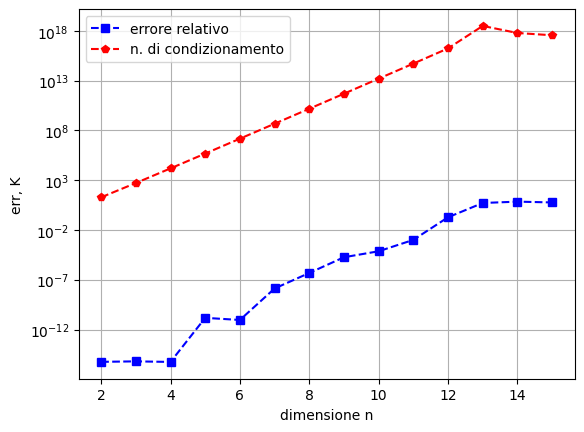

In [10]:
err_rel = []
K = []
N = range(2,16)

for n in N:
  H = scipy.linalg.hilbert(n)
  x_ex = np.ones(n)
  b = H @ x_ex

  P, L, U = scipy.linalg.lu(H)

  y = fwsub(L, P.T@b)
  x = bksub(U, y)

  err_rel.append(np.linalg.norm(x-x_ex)/np.linalg.norm(x_ex))
  K.append(np.linalg.cond(H))

plt.semilogy(N,err_rel,'b--s')
plt.semilogy(N,K,'r--p')
plt.grid()
plt.legend(['errore relativo', 'n. di condizionamento'])
plt.xlabel('dimensione n')
plt.ylabel("err, K")
plt.show()

La figura mostra, in scala semilogaritmica, l'andamento dell'errore relativo e del numero di condizionamento in funzione di $n$. Si osserva che, in accordo con la teoria, l'errore relativo cresce al crescere di $n$, conseguenza del fatto che anche $k(\mathbf{A})$ cresce con $n$. In particolare, si ricorda la seguente stima:

$$ \text{err}_\text{rel} \leq k(\mathbf{A})\dfrac{\|\delta\mathbf{b}\|}{\|\mathbf{b}\|},$$

con $\delta\mathbf{b}$ perturbazione sui dati, che, nel caso in esame, è rappresentata dall'errore macchona, costante al variare di $n$.